Tutorial 1: Pixelizations
=========================

In the previous chapters, we used light profiles to model the light of a strong lens's source galaxy, where the light
profile was an analytic description of how the luminosity varies as a function of radius. In this chapter, we are
instead going to reconstruct the source's light on a pixel-grid, and in this tutorial we will learn how to create
a source-plane pixelization in **PyAutoLens**.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


__Initial Setup__

Lets setup a lensed source-plane grid, using a lens galaxy and tracer. 

Note how our source galaxy no longer uses a light profile, as we will instead reconstruct its light using a 
pixelization.

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0),
        einstein_radius=1.6,
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, angle=45.0),
    ),
    shear=al.mp.ExternalShear(elliptical_comps=(0.05, 0.05)),
)

source_galaxy = al.Galaxy(redshift=1.0)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=grid)[1]

__Pixelization__

Next, lets set up a `Pixelization` using the `pixelization` module, which is access via `pix` for conciseness.

There are multiple `Pixelization`'s available in **PyAutoLens**. For now, we'll keep it simple and use a uniform 
rectangular grid, whose `shape` defines its $(y,x)$ dimensions.

In [3]:
rectangular = al.pix.Rectangular(shape=(25, 25))

By itself, a pixelization does not tell us much. It has no grid of $(y,x)$ coordinates, no image, and no information
about the lens we are fitting. This information comes when we use the pixelization to create up a `Mapper`, which we
perform below using the (traced) source-plane grid that we created above.

In [4]:
mapper = rectangular.mapper_from_grid_and_sparse_grid(grid=source_plane_grid)

This `Mapper` is a `RectangularMapper`, every `Pixelization` generates it owns mapper.

In [5]:
print(type(mapper))

<class 'autoarray.inversion.mappers.MapperRectangular'>


By plotting our mapper, we now see our `Pixelization`. Its a fairly boring grid of rectangular pixels.

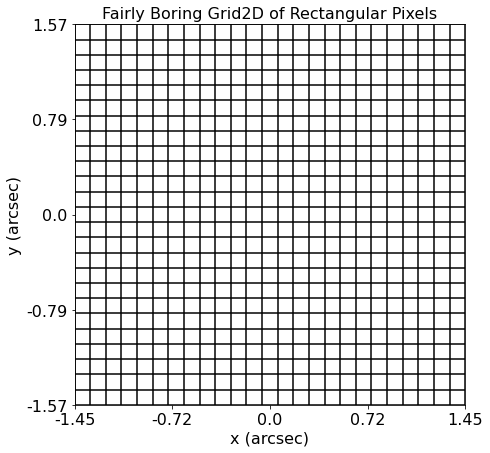

In [6]:
include_2d = aplt.Include2D(
    mapper_source_grid_slim=False, mapper_source_pixelization_grid=False
)

mapper_plotter = aplt.MapperPlotter(mapper=mapper, include_2d=include_2d)
mapper_plotter.set_title("Fairly Boring Grid2D of Rectangular Pixels")
mapper_plotter.figure_2d()

However, the `Mapper` does contain lots of interesting information about our `Pixelization`, for example its 
pixelization_grid tells us where the pixel centers are located.

In [7]:
print("Rectangular Grid2D Pixel Centre 1:")
print(mapper.source_pixelization_grid[0])
print("Rectangular Grid2D Pixel Centre 2:")
print(mapper.source_pixelization_grid[1])
print("Rectangular Grid2D Pixel Centre 3:")
print(mapper.source_pixelization_grid[2])
print("etc.")

Rectangular Grid2D Pixel Centre 1:
[ 1.51086716 -1.39010233]
Rectangular Grid2D Pixel Centre 2:
[ 1.51086716 -1.27426047]
Rectangular Grid2D Pixel Centre 3:
[ 1.51086716 -1.15841861]
etc.


We can plot these centre on our grid, to make it look slightly less boring!

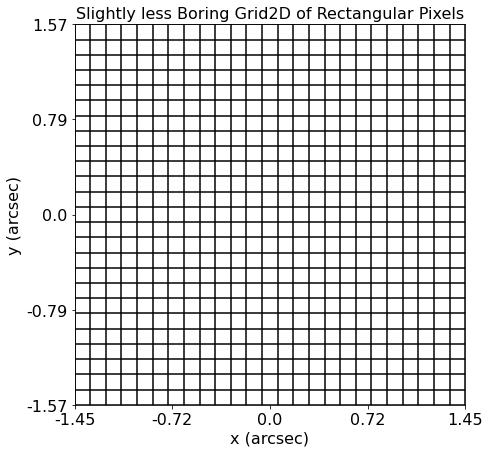

In [8]:
include_2d = aplt.Include2D(
    mapper_source_grid_slim=False, mapper_source_pixelization_grid=False
)

mapper_plotter = aplt.MapperPlotter(mapper=mapper, include_2d=include_2d)
mapper_plotter.set_title("Slightly less Boring Grid2D of Rectangular Pixels")
mapper_plotter.figure_2d()

The `Mapper` also has the (source-plane) grid that we passed when we set it up. Lets check they`re the same.

In [9]:
print("Source Grid2D Pixel 1")
print(source_plane_grid[0])
print(mapper.source_grid_slim[0])
print("Source Grid2D Pixel 2")
print(source_plane_grid[1])
print(mapper.source_grid_slim[1])
print("etc.")

Source Grid2D Pixel 1
[ 1.57381995 -1.32631995]
[ 1.57381995 -1.32631995]
Source Grid2D Pixel 2
[ 1.56043929 -1.2898122 ]
[ 1.56043929 -1.2898122 ]
etc.


We can over-lay this grid on the figure, which is starting to look a bit less boring now!

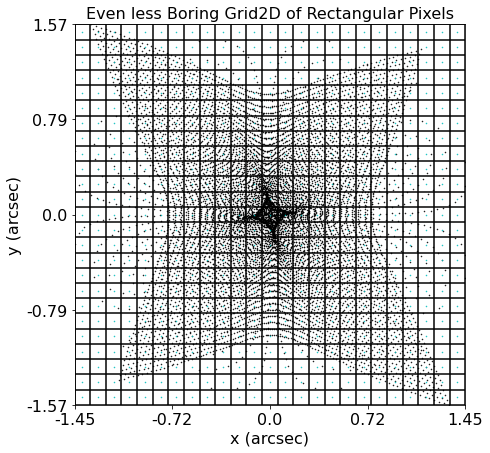

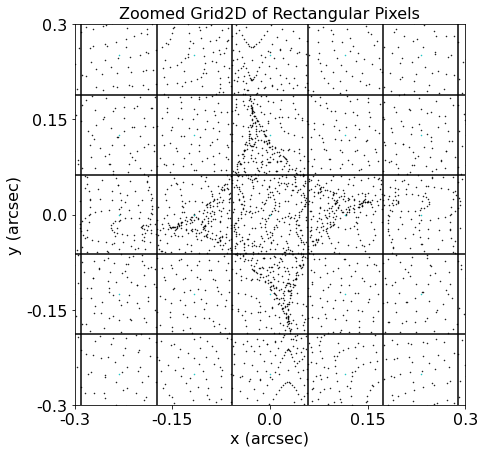

In [10]:
include_2d = aplt.Include2D(
    mapper_source_grid_slim=True, mapper_source_pixelization_grid=True
)

mapper_plotter = aplt.MapperPlotter(mapper=mapper, include_2d=include_2d)
mapper_plotter.set_title("Even less Boring Grid2D of Rectangular Pixels")
mapper_plotter.figure_2d()

mat_plot_2d = aplt.MatPlot2D(axis=aplt.Axis(extent=[-0.3, 0.3, -0.3, 0.3]))

mapper_plotter = aplt.MapperPlotter(
    mapper=mapper, mat_plot_2d=mat_plot_2d, include_2d=include_2d
)
mapper_plotter.set_title("Zoomed Grid2D of Rectangular Pixels")
mapper_plotter.figure_2d()

Finally, the mapper`s `pixeliation_grid` has lots of information about the pixelization, for example, the arc-second 
size and dimensions.

In [11]:
print(mapper.source_pixelization_grid.shape_native_scaled)
print(mapper.source_pixelization_grid.scaled_maxima)
print(mapper.source_pixelization_grid.scaled_minima)

(3.1476399128986547, 2.8960465230680215)
(Grid2D(1.57381996), Grid2D(1.44802326))
(Grid2D(-1.57381996), Grid2D(-1.44802326))


__Wrap Up__

This was a relatively gentle overview of pixelizations, but one that was hopefully easy to follow. Think about the 
following questions before moving on to the next tutorial:

 1) Look at how the source-grid coordinates are distributed over the rectangular pixel-grid. Are these points 
 distributed evenly over the rectangular grid`s pixels? Do some pixels have a lot more grid-points inside of them? 
 Do some pixels have no grid-points in them?

 2) The rectangular pixelization`s edges are aligned with the most exterior coordinates of the source-grid. This is 
 intentional, why do you think this is?